# Understanding a genetic disease with the help of Bioinformatics

Welcome to the programming portion of our course! In this electronic notebook, you'll get to explore some tools for understanding and working with biological sequence data. This notebook has a walkthroughout of different applications, with actual data you'll get to work with and context for the questions we're trying to answer with this data.


To run the commands that appear in a cell, once you click on the cell, you can either press the Play button to the left of the cell or press Shift + Enter. 

Insulin is a protein that allows sugar (glucose) to enter the body's cells (mainly liver, adipose tissue and skeletal muscle). This hormone plays a key role in the regulation of glucose levels in the blood ('hypoglycemic' effect). It is produced by the beta cells in the pancreas.

Type I diabetes (insulino dependent; IDDM) is more often than not due to the absence of insulin: for various poorly understood reasons (virus, autoimmune aetiology, ...), the pancreas is no longer able to produce the protein.
Type II diabetes (non-insulin dependent; NIDDM) is a metabolic disease (insulin resistance). Obesity is thought to be the primary cause of type II diabetes in people who are genetically predisposed to the disease.

A very rare genetic variation - [rs121908261](https://www.ncbi.nlm.nih.gov/snp/rs121908261) - leads to the the production of a non functional insulin and is the cause of type I diabetes in several demographics (Molven et al., 2008).

https://github.com/igematberkeley/compbio-training/tree/main/splash

# The insulin gene and the human genome

Below is a subsection of the gene sequence that encodes for the insulin protein ('wild sequence')...
`cagccgcagcctttgtgaaccaacacctgtgcggctcacacctggtggaagctctctacc`

On which of our 23 chromosomes is this gene located?

Use the tool 'BLAT'!

Technical information: 'BLAT' is a bioinformatics tool for comparing a DNA sequence against the whole genome sequence (the human genome has 3 billion nucleotides, so trying to find a close enough match would naively require `3000000 - len(seq)` searches!). If the sequence exists, BLAT finds the sequence that is the most similar in just a few seconds. It's a bit like a small 'Google Map' of the human genome.
* Navigate to https://genome.ucsc.edu/cgi-bin/hgBlat. 
* Copy the DNA sequence into the text box. 
* Click on 'Submit'
* In the page 'BLAT Search Result': choose the best score and click 'Browser'. 
  * This will show the location of the gene within the human genome, allowing you to see what genes are nearby, alternative isoforms of the gene, the chromosomal coordinates, and more. Try poking around/looking around the browser until you can find this information about the chromosome it's on. 

chromosome 11

## Comparing DNA sequences - Diagnosing a rare genetic disease

In the previous exercise, you saw that we could select the "Assembly" of the genome to align our sequence to. Yet, you may be wondering: "Isn't every human genome different? Who's genome is that assembly referring to"? Indeed, each organism's/human's genome is different: about 1 nucleotide in 1000 differs from one person to another, and from one genome to another. Genome assemblies are made based on a "canonical", or standard genome where the most frequent variants at each position are included in the assembly. Thus, the assembly does not represent one person's genome alone but is meant to be an ensemble representation of the genome for the species. 

Against this assembly, we then identify differences from this assembly that each person may have as mutations or variants; some have no effect on a person, while others may be associated with genetic diseases. These variants can be single-position replacements, like an A for T or a C for a G; but, they can also be insertions or deletions of bases, and these variants known as indels, can cause potentially dysfunctional effects. 

In 2008, scientists studied a Norwegian family in which several members had diabetes (type I or type II) (Molven et al., 2008).

All diabetic type I members of the family carry the same rare variation in the gene which encodes for insulin.

Here is the family's pedigree (phenotype and family relationship). You might have seen a pedigree in your science class before; it's essentially a systematic drawing of a family tree that focuses on the inheritance of various alleles (black means they have the recessive form of the allele variant; white means they are either heterozygous or have the dominant form of the allele variant). Though you won't need to know how to read a pedigree for this notebook, you can learn [more here](https://www.khanacademy.org/science/ap-biology/heredity/non-mendelian-genetics/a/hs-pedigrees-review).

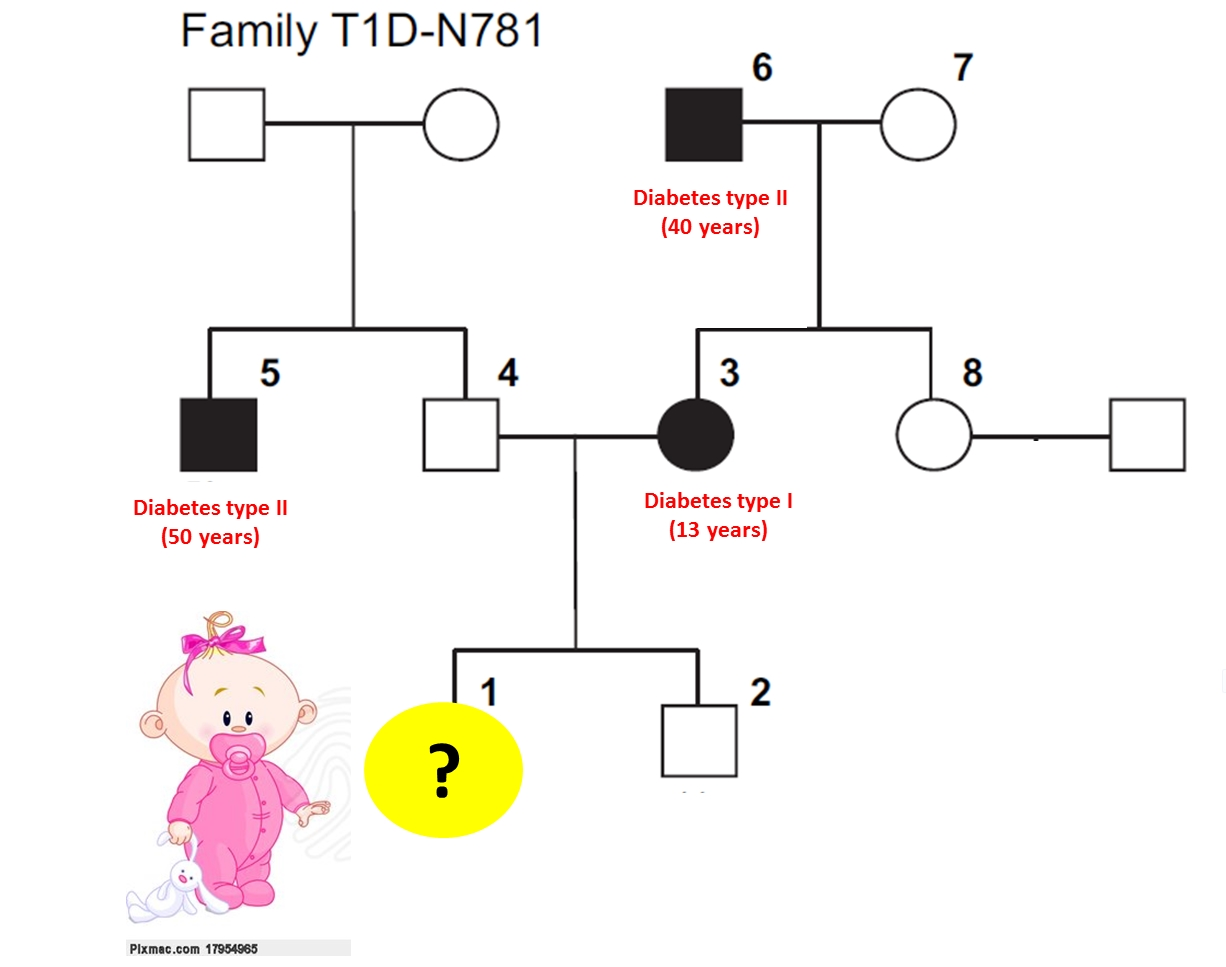

Does this baby carry the mutation associated with diabetes?
To answer this question we will be investigating all the insulin genes for each family member in the tree. Start by uploading the sequence files by clicking the folder on the left and then uploading all the FASTA files. You can download the FASTA files here: 

In [1]:
!pip install -q condacolab
import condacolab
condacolab.install()

⏬ Downloading https://github.com/jaimergp/miniforge/releases/latest/download/Mambaforge-colab-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:32
🔁 Restarting kernel...


In [2]:
# run this cell to use biopython
!conda install biopython

Solving environment: \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - biopython


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    biopython-1.79             |   py37h540881e_2         2.6 MB  conda-forge
    ca-certificates-2022.9.24  |       ha878542_0         150 KB  conda-forge
    certifi-2022.9.24          |     pyhd8ed1ab_0         155 KB  conda-forge
    conda-22.9.0               |   py37h89c1867_1         960 KB  conda-forge
    libblas-3.9.0              |16_linux64_openblas          13 KB  conda-forge
    libcblas-3.9.0             |16_linux64_openblas          13 KB  conda-forge
    libgfortran-ng-12.2.0      |      h69a702a_19          22 KB  conda-forge
    libgfortran5-12.2.0        |      h3

In [3]:
# run this cell to use muscle
!conda install -c bioconda muscle

Solving environment: | / - \ | / - \ | / - \ | / - \ done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - muscle


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    muscle-5.1                 |       h9f5acd7_1         301 KB  bioconda
    ------------------------------------------------------------
                                           Total:         301 KB

The following NEW packages will be INSTALLED:

  muscle             bioconda/linux-64::muscle-5.1-h9f5acd7_1 None



muscle-5.1           | 301 KB    | : 100% 1.0/1 [00:00<00:00,  3.80it/s]                 
Preparing transaction: / done
Verifying transaction: \ done
Executing transaction: / done
Retrieving notices: ...working... done


In [1]:
# run this cell to do imports
from Bio import SeqIO
import numpy as np

Alignments are used to align serveral versions of a gene with each other, we will be using muscle to do so:

In [2]:
# example command for alignment
!muscle -super5 example_seq.fasta -output example_seqs_aligned.fa


muscle 5.1.linux64 []  13.3Gb RAM, 2 cores
Built Feb 24 2022 03:16:15
(C) Copyright 2004-2021 Robert C. Edgar.
https://drive5.com

Input: 2 seqs, length avg 15 max 16

00:00 32Mb    100.0% Derep 1 uniques, 0 dupes
00:00 34Mb    100.0% UCLUST 2 seqs EE<0.01, 1 centroids, 0 members
00:00 34Mb   CPU has 2 cores, running 2 threads                   
00:00 35Mb    100.0% UCLUST 2 seqs EE<0.30, 1 centroids, 0 members
00:00 44Mb    100.0% Make cluster MFAs                            
1 clusters pass 1                     
1 clusters pass 2
00:00 44Mb   
00:00 44Mb   Align cluster 1 / 1 (2 seqs)
00:00 44Mb   
00:00 44Mb    100.0% Calc posteriors
00:00 44Mb    100.0% UPGMA5         
00:00 44Mb    100.0% Consensus sequences


In [3]:
# example sequences and aligned using dashes
for seq_rec in SeqIO.parse("example_seqs_aligned.fa", "fasta"):
    print(str(seq_rec.seq))

gccgattagggcccat
gcga--aagggcccat


The alignment command adds dashes to align the sequences, these dashes represent that there could have been a deletion or insertion. Also recognize that even with the dashes the nucleotide in each position does not match exactly.

In [4]:
# TODO: write the command to align the sequences in seq.fasta and save  it to seqs_aligned.fa
!muscle -super5 seq.fasta -output seqs_aligned.fa


muscle 5.1.linux64 []  13.3Gb RAM, 2 cores
Built Feb 24 2022 03:16:15
(C) Copyright 2004-2021 Robert C. Edgar.
https://drive5.com

Input: 8 seqs, length avg 120 max 120

00:00 32Mb    100.0% Derep 3 uniques, 4 dupes
00:00 34Mb   CPU has 2 cores, running 2 threads                   
00:00 34Mb    100.0% UCLUST 3 seqs EE<0.01, 1 centroids, 1 members
00:00 35Mb    100.0% UCLUST 1 seqs EE<0.30, 0 centroids, 0 members
00:00 35Mb    100.0% Make cluster MFAs                            
1 clusters pass 1                     
1 clusters pass 2
00:00 35Mb   Align cluster 1 / 1 (1 seq)
00:00 35Mb    100.0% Consensus sequences
Inserting 5 dupes... done.              


In [20]:
seqs = ["placeholder"] * 8

# TODO: write a loop that adds all the aligned sequences to the seqs array
for seq_rec in SeqIO.parse("seqs_aligned.fa", "fasta"):
    seqs[(int(seq_rec.name) - 1)] = str(seq_rec.seq)

# this loop goes through the alignment and identifies if in each aligned sequence the nucleotide is the same in all of them
matching = ""
for i in np.arange(len(seqs[0])):
    if (seqs[0][i] == seqs[1][i] == seqs[2][i] == seqs[3][i] == seqs[4][i] == seqs[5][i] == seqs[6][i] == seqs[7][i]):
        matching += "*" # feel free to change this to a different character, it signifies a match!
    else:
        matching += " "

print("* show all matching nucleotides while spaces show them not matching")
print("1", seqs[0])
print("2", seqs[1])
print("3", seqs[2])
print("4", seqs[3])
print("5", seqs[4])
print("6", seqs[5])
print("7", seqs[6])
print("8", seqs[7])
print("a", matching)

* show all matching nucleotides while spaces show them not matching
1 cagccgcagcctttgtgaaccaacacctgtgcggctcacacctggtggaagctctctacctagtgtgcggggaacgaggcttcttctacacacccaagacctgccgggaggcagaggacc
2 cagccgcagcctttgtgaaccaacacctgtgcggctcacacctggtggaagctctctacctagtgtgcggggaacgaggcttcttctacacacccaagacccgccgggaggcagaggacc
3 cagccgcagcctttgtgaaccaacacctgtgcggctcacacctggtggaagctctctacctagtgtgcggggaacgaggcttcttctacacacccaagacctgccgggaggcagaggacc
4 cagccgcagcctttgtgaaccaacacctgtgcggctcacacctggtggaagctctctacctagtgtgcggggaacgaggcttcttctacacacccaagacccgccgggaggcagaggacc
5 cagccgcagcctttgtgaaccaacacctgtgcggctcacacctggtggaagctctctacctagtgtgcggggaacgaggcttcttctacacacccaagacccgccgggaggcagaggacc
6 cagccgcagcctttgtgaaccaacacctgtgcggctcacacctggtggaagctctctacctagtgtgcggggaacgaggcttcttctacacacccaagacccgccgggaggcagaggacc
7 cagccgcagcctttgtgaaccaacacctgtgcggctcacacctggtggaagctctctacctagtgtgcggagaacgaggcttcttctacacacccaagacccgccgggaggcagaggacc
8 cagccgcagcctttgtgaaccaacacctgtgcggctcacacctggtggaagctctctacctagtgtgcg

Based on the your results and the family tree, does this baby carry the mutation associated with diabetes?

Yes

## DNA translation -> protein

Check the effect of the mutation C -> T (R55C)...

Like all proteins, insulin is composed of a sequence of amino acids. The order of the amino acids is determined by the nucleic acid sequence of the insulin gene.
3 letters of DNA (codon) correspond to one amino acid (symbolized by letters: K for lysine, M for methionine, etc.). We've turned the codon wheel into a Python dictionary to make it easier for you to do this "translation" *in silico* :) 

In [6]:
# dictionary of codons to amino acids
translation = {
    "TTT": "F", "TTC": "F", "TTA": "L", "TTG": "L", "CTT": "L", "CTC": "L",
    "CTA": "L", "CTG": "L", "ATT": "I", "ATC": "I", "ATA": "I", "ATG": "M",
    "GTT": "V", "GTC": "V", "GTA": "V", "GTG": "V", "TCT": "S", "TCC": "S",
    "TCA": "S", "TCG": "S", "CCT": "P", "CCC": "P", "CCA": "P", "CCG": "P",
    "ACT": "T", "ACC": "T", "ACA": "T", "ACG": "T", "GCT": "A", "GCC": "A",
    "GCA": "A", "GCG": "A", "TAT": "Y", "TAC": "Y", "TAA": "", "TAG": "",
    "CAT": "H", "CAC": "H", "CAA": "Q", "CAG": "Q", "AAT": "N", "AAC": "N",
    "AAA": "K", "AAG": "K", "GAT": "D", "GAC": "D", "GAA": "E", "GAG": "E",
    "TGT": "C", "TGC": "C", "TGA": "", "TGG": "W", "CGT": "R", "CGC": "R",
    "CGA": "R", "CGG": "R", "AGT": "S", "AGC": "S", "AGA": "R", "AGG": "R",
    "GGT": "G", "GGC": "G", "GGA": "G", "GGG": "G",
}

This is a piece of the DNA sequence of the normal insulin gene.

`aag acc cgc cgg gag`

This is a piece of the DNA sequence of the insulin gene with the c -> t variation, associated with type I diabetes.

`aag acc tgc cgg gag` 

In [7]:
# the normal and mutated sequences
sequence_normal = "AAGACCCGCCGGGAG"
sequence_mutation = "AAGACCTGCCGGGAG"

Does the C->T mutation change the amino acid sequence of insulin? The first step to figuring this out is to create a function that translates proteins.

In [8]:
import numpy as np

def translate(seq):
    # TODO: write a function that translates the sequence into a protein
    protein = ""
    for i in np.arange(0, len(seq), 3):
        protein += translation[seq[i:i+3]]
    return protein

In [9]:
# TODO: translate the normal sequence
translate(sequence_normal)

'KTRRE'

In [10]:
# TODO: translate the mutated sequence
translate(sequence_mutation)

'KTCRE'

Did the mutation change the amino acid sequence?

Yes

Subsitute a different nucleotide in the normal sequence, did that cause a change in the amino acid sequence?

In [11]:
# TODO: create another mutated sequence and translate it
translate("GAGACCCGCCGGGAG")

'ETRRE'

Yes

It turns out there are lots of variants on the INS (insulin) gene that we can review systematically through databases such as NCBI ClinVar and gnomAD (Genome Aggregation Database). gnomAD, in particular, features a lot of visual data to compare the clinical pathogenicity, the presence in various populations, and more: https://gnomad.broadinstitute.org/transcript/ENST00000397262?dataset=gnomad_r2_1

# 3D structure of insulin

Since 1958, researchers have been able to crystallize proteins and then 'take a picture' of them by using X-rays. The results of these experiments are then analyzed using bioinformatic programs which make it possible to view the 3D structure of proteins such as insulin.

View the 3D structure of insulin

* Go to the PDB entry 2LWZ: https://www.rcsb.org/structure/2LWZ
* On the left panel: click one 3D view: Structure

For fun, here are the raw experimental data, the spatial coordinates(X, Y, Z) of every atom in each amino of insulin (search ATOM in the page)

Note: There is no 3D structure data for insulin with the R55C mutation.

# Is insulin specific to humans?

This is the full sequence of human insulin amino acid (in UniProtKB):
MALWMRLLPLLALLALWGPDPAAAFVNQHLCGSHLVEALYLVCGERGFFYTPKTRREAEDLQVGQVELGGGPGAGSLQPLALEGSLQKRGIVEQCCTSICSLYQLENYCN

Is this protein specific to humans?

* Copy the sequence and paste it into the tool 'BLAST' http://www.uniprot.org/blast/
* Select 'Target Database = UniProtKB/Swiss-Prot'
* Click on 'Run BLAST'
* Search on Google for images corresponding to the different Latin names of the species (example 'Octodon degus')

No, it is in other organisms.

**An open-ended question:** Why do you think this gene appears in other species? Do you think this sequence varies in other organisms/does it have the same exact sequence in different organisms?

BONUS: Blast will generate an alignment for you of similar sequences. You can use Python modules like `biopython` to read in this alignment to Python, and then find regions of the protein that are well conserved across organisms. Try it out below!